# Quantum Computing: Lab 6

## Quantum Error Correction

__Exercise 1:__ Create a circuit to prepare the following state: $|\psi\rangle = \sqrt{3/4} |0\rangle + \sqrt{1/4} i |1\rangle$

In [1]:
import qiskit
from qiskit.aqua.circuits import StateVectorCircuit
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram

import numpy as np

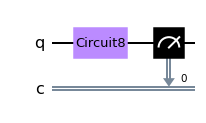

In [2]:
vec = np.array([0.8660254038, 0.5j])

x_fourth_circ = QuantumCircuit(1, 1)

x_fourth_circ.append(StateVectorCircuit(vec).construct_circuit(), [0])
x_fourth_circ.measure(0, 0)

x_fourth_circ.draw('mpl')

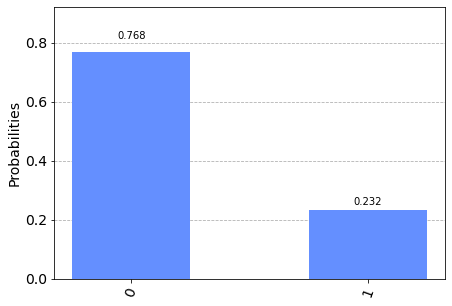

In [3]:
job = execute(x_fourth_circ, BasicAer.get_backend('qasm_simulator'))
result = job.result()
plot_histogram(result.get_counts())

In [4]:
x_fourth_circ = QuantumCircuit(1)

x_fourth_circ.append(StateVectorCircuit(vec).construct_circuit(), [0])

__Exercise 2:__ Implement the 3-Qubit Code for Bit-Error Correction. Initialize the circuit with $|\psi\rangle$ from Ex. 1 and test if the Bit-Error Correction works.

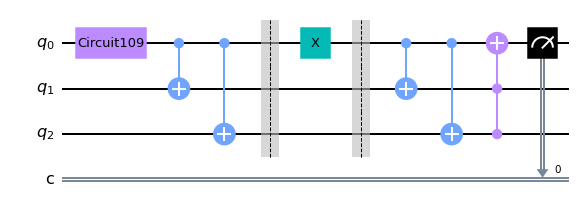

In [5]:
qc = QuantumCircuit(3, 1)

qc.append(x_fourth_circ, [0])

qc.cnot(0, 1)
qc.cnot(0, 2)
qc.barrier(range(3))

qc.x(0)

qc.barrier(range(3))
qc.cnot(0, 1)
qc.cnot(0, 2)
qc.toffoli(2, 1, 0)

qc.measure(0, 0)

qc.draw('mpl')

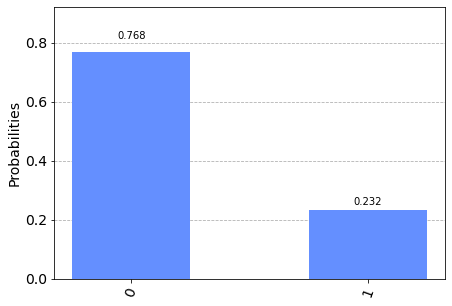

In [6]:
job = execute(qc, BasicAer.get_backend('qasm_simulator'))
result = job.result()
plot_histogram(result.get_counts())

__Exercise 3:__ Implement the 3-Qubit Code for Phase-Error Correction. Initialize the circuit with $|\psi\rangle$ from Ex. 1 and test if the Phase-Error Correction works.

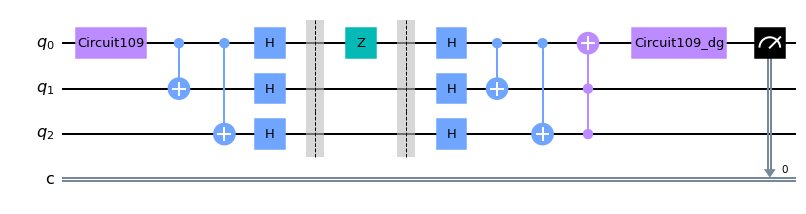

In [7]:
qc = QuantumCircuit(3, 1)

qc.append(x_fourth_circ, [0])

qc.cnot(0, 1)
qc.cnot(0, 2)
qc.h(range(3))
qc.barrier(range(3))

qc.z(0)

qc.barrier(range(3))
qc.h(range(3))
qc.cnot(0, 1)
qc.cnot(0, 2)
qc.toffoli(2, 1, 0)

qc.append(x_fourth_circ.inverse(), [0])

qc.measure(0, 0)

qc.draw('mpl')

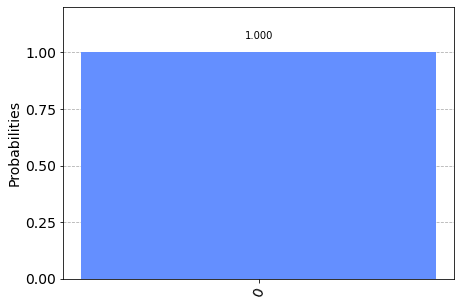

In [8]:
job = execute(qc, BasicAer.get_backend('qasm_simulator'))
result = job.result()
plot_histogram(result.get_counts())

__Exercise 4:__ Implement Shor's 9-Qubit Code. Initialize the circuit with $|\psi\rangle$ from Ex. 1 and test if the Bit-Error and Phase-Error Correction works.

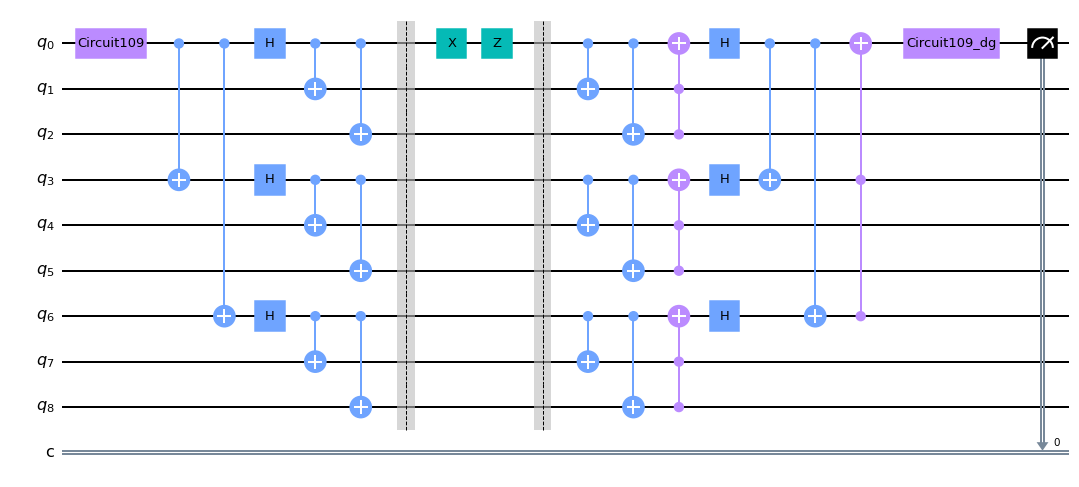

In [9]:
qc = QuantumCircuit(9, 1)

qc.append(x_fourth_circ, [0])

qc.cnot(0, 3)
qc.cnot(0, 6)

qc.h(range(0, 9, 3))

qc.cnot(0, 1)
qc.cnot(0, 2)

qc.cnot(3, 4)
qc.cnot(3, 5)

qc.cnot(6, 7)
qc.cnot(6, 8)

qc.barrier(range(9))

qc.x(0)
qc.z(0)

qc.barrier(range(9))

qc.cnot(0, 1)
qc.cnot(0, 2)

qc.cnot(3, 4)
qc.cnot(3, 5)

qc.cnot(6, 7)
qc.cnot(6, 8)

qc.toffoli(2, 1, 0)
qc.toffoli(5, 4, 3)
qc.toffoli(8, 7, 6)

qc.h(range(0, 9, 3))

qc.cnot(0, 3)
qc.cnot(0, 6)

qc.toffoli(6, 3, 0)

qc.append(x_fourth_circ.inverse(), [0])

qc.measure(0, 0)

qc.draw('mpl')

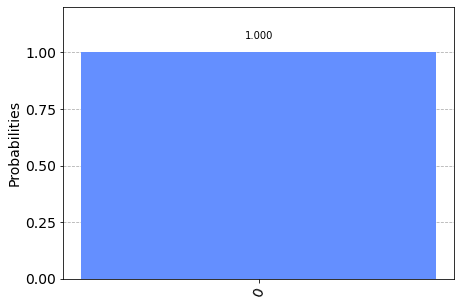

In [10]:
job = execute(qc, BasicAer.get_backend('qasm_simulator'))
result = job.result()
plot_histogram(result.get_counts())